# Ecommerce Customer Device Usage

The project objective is to predict the yearly amount spent on the basis of Average Session Length, Time spent on the app, Time Spent on the website and on the basis of length of membership taken. To also find what factors should we reconsider to increase the yearly amount spent by customers.

The dataset consists of Email of customer, Address, Avatar, Avg. Session length, Time on App, Time on Website, Length of Membership and Yearly Amount spent. Here, Yearly Amount Spent acts as a target variable or dependent features whereas other acts as features or independent variables.

Different Regression Models such as Linear Regression, Polynomila Regression, Decison Tree Regression and Random Forest Regression will be applied on dataset to find out which model will work perfectly for our given dataset and yeild more accurate results.

# Importing required Libraires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

sns.set_theme()

In [2]:
df = pd.read_csv('EcommerceCustomers', sep=',')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Since Email,  Address and Avatar will not affect the yearly amount spent so we can drop them directly

In [4]:
df.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)

In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Here data are in suitable range so it doesn't seems to need of feature scaling.



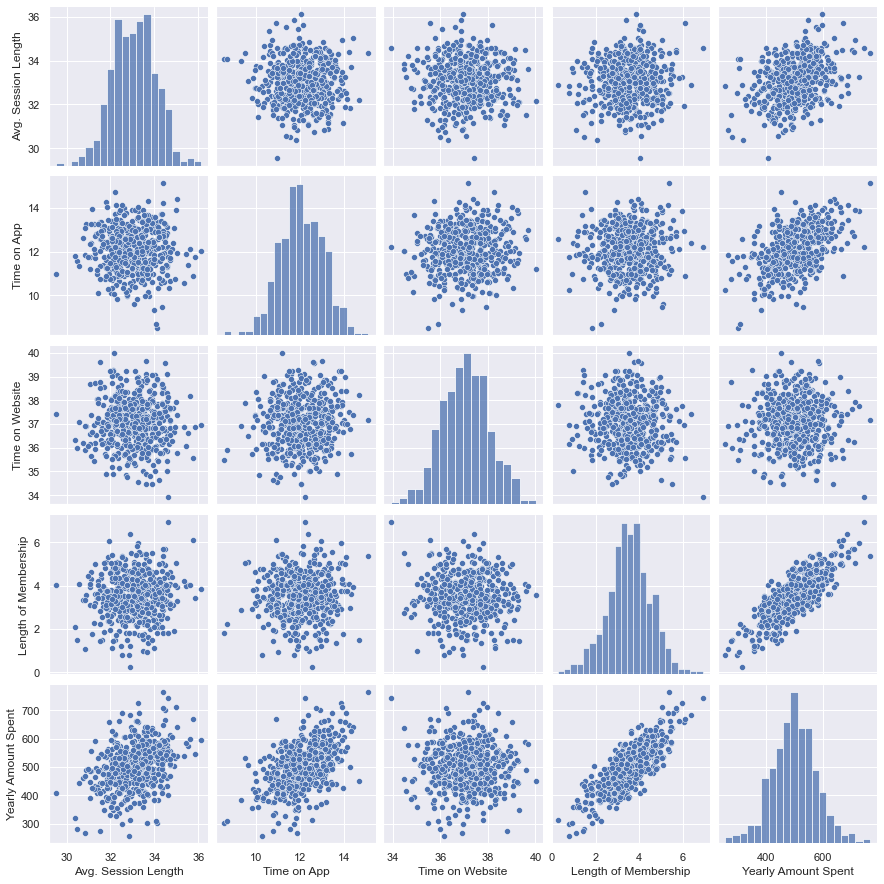

In [6]:
sns.pairplot(data=df)
plt.show()

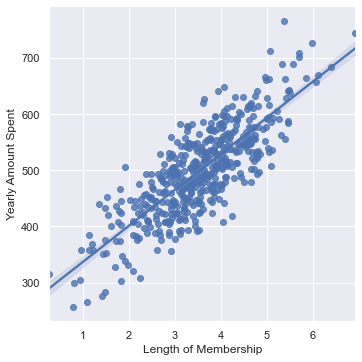

In [7]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=df)

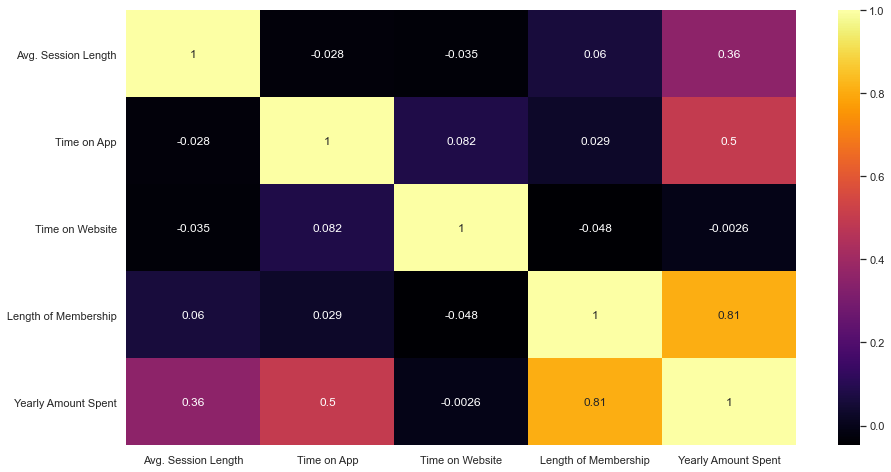

In [8]:
fig, ax = plt.subplots(figsize=(15,8))      
sns.heatmap(df.corr(),cmap='inferno',annot=True)
plt.show()

Here we can alearly see that the yearly amount spent seems to be most dependent on length of membership as the correlation is highest and is poorly dependent on time spent on website so we can drop time spent on website for training our data.

In [9]:
X = df[['Avg. Session Length', 'Time on App','Length of Membership']]
y = df.iloc[:, -1]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  random_state=50)

# Using Linear Regression Model

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

prediction = lin_reg.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))

MAE :   9.476672662373987
MSE :   135.74256201828368
RMAE :   3.0784204817363703
R2_Score :    0.9818198668537429


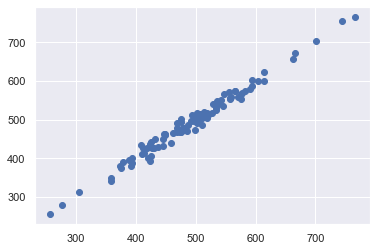

In [12]:
plt.scatter(y_test, prediction)
plt.show()

# Using Polynomail Regression Model

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5)
poly_X = poly.fit_transform(X_train)

lin_reg.fit(X_train, y_train)

prediction = lin_reg.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))


MAE :   9.476672662373987
MSE :   135.74256201828368
RMAE :   3.0784204817363703
R2_Score :    0.9818198668537429


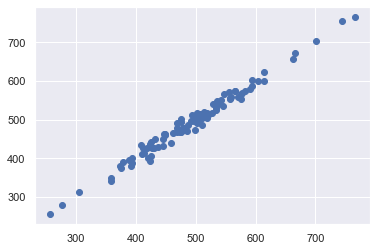

In [14]:
plt.scatter(y_test, prediction)
plt.show()

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeRegressor

des_tree = DecisionTreeRegressor(max_depth=50)

des_tree.fit(X_train, y_train)

prediction = des_tree.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))

MAE :   18.327995604269507
MSE :   608.8483635870467
RMAE :   4.281120835046531
R2_Score :    0.9184563474321167


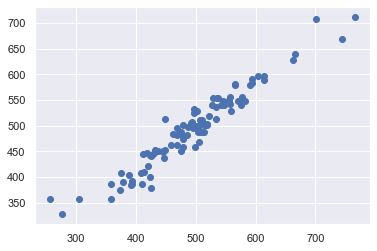

In [16]:
plt.scatter(y_test, prediction)
plt.show()

# Random Forest Regressor 

In [17]:
ran_reg = RandomForestRegressor(random_state=25, max_depth=50, n_estimators=100)

ran_reg.fit(X_train, y_train)

prediction = ran_reg.predict(X_test)

print('MAE :'," ", metrics.mean_absolute_error(y_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(y_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_absolute_error(y_test,prediction)))
print("R2_Score : ", " ",metrics.r2_score(y_test, prediction))

MAE :   16.08359080544247
MSE :   491.18280174889946
RMAE :   4.010435238903936
R2_Score :    0.9342154103902663


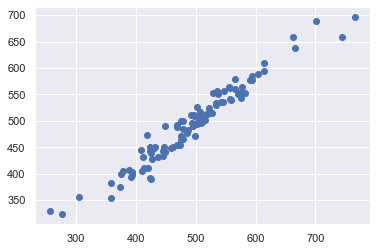

In [18]:
plt.scatter(y_test, prediction)
plt.show()

Here, we can clearly see that linear regression and ploynomial regression of any degree yeild better results than decision tree and random forest algorithm.

Also lets look what their coffecient means. Lets take for linear model as it has higher accuracy.

In [19]:
coeffecients = pd.DataFrame(lin_reg.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,25.562322
Time on App,38.791411
Length of Membership,61.827933


The data interpets that the yearly amount spent is more based in length of membership then avg. session length and time spent on app. So, company should try to improve their app User Experience and try to increase the average session length.

Also, company should give emphasis on their website to further improve the yearly amount spent as we dropped it because it had a very less effect on it.